<a href="https://www.kaggle.com/code/jesuisetudiant/languages-by-total-number-of-speakers-analysis?scriptVersionId=120641605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-languages-by-total-number-of-speakers/List of languages by total number of speakers.csv


In [2]:
data = pd.read_csv('/kaggle/input/list-of-languages-by-total-number-of-speakers/List of languages by total number of speakers.csv')
data.head()

,Unnamed: 0,Language,Family,Branch,First-language(L1) speakers,Second-language(L2) speakers,Total speakers(L1+L2)
0,0,English(excl. creole languages),Indo-European,Germanic,372.9 million,1.080 billion[5],1.452 billion
1,1,"Mandarin Chinese(incl. Standard Chinese, but e...",Sino-Tibetan,Sinitic,929.0 million,198.7 million[6],1.118 billion
2,2,Hindi(excl. Urdu),Indo-European,Indo-Aryan,343.9 million,258.3 million[7],602.2 million
3,3,Spanish,Indo-European,Romance,474.7 million,73.6 million[8],548.3 million
4,4,French,Indo-European,Romance,79.9 million,194.2 million[9],274.1 million


In [3]:
# There is no need for a Unnamed Column So dropping it firstly
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Language,Family,Branch,First-language(L1) speakers,Second-language(L2) speakers,Total speakers(L1+L2)
0,English(excl. creole languages),Indo-European,Germanic,372.9 million,1.080 billion[5],1.452 billion
1,"Mandarin Chinese(incl. Standard Chinese, but e...",Sino-Tibetan,Sinitic,929.0 million,198.7 million[6],1.118 billion
2,Hindi(excl. Urdu),Indo-European,Indo-Aryan,343.9 million,258.3 million[7],602.2 million
3,Spanish,Indo-European,Romance,474.7 million,73.6 million[8],548.3 million
4,French,Indo-European,Romance,79.9 million,194.2 million[9],274.1 million


In [4]:
# Lets view shape of the data
data.shape

(45, 6)

## **Is there any Duplicate value in the dataset**

In [5]:
# Lets find if there is any duplicate value in the dataset
data.duplicated().any()

False

Not a single value is duplicated in the dataset

In [6]:
# Lets heck for Null value sin the dataset
data.isna().sum()

Language                        0
Family                          0
Branch                          0
First-language(L1) speakers     0
Second-language(L2) speakers    0
Total speakers(L1+L2)           0
dtype: int64

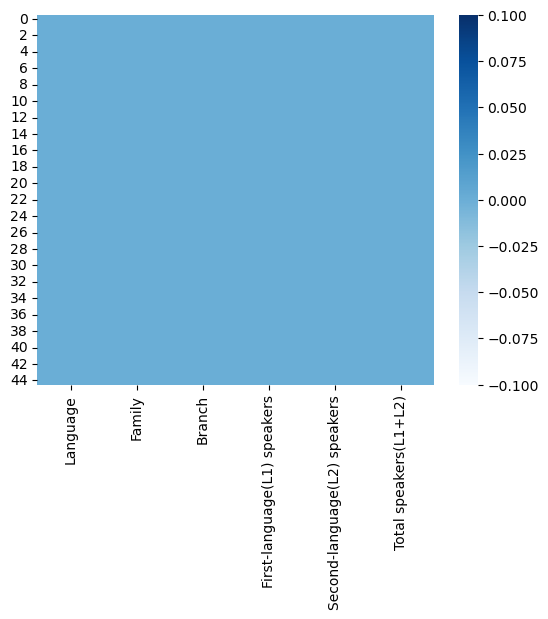

In [7]:
# Lets check Null value susing heatmap
sns.heatmap(data.isna(), cmap='Blues')
plt.show()

Not a single value is misisng in the dataset

## **How many Families of the Languages we have in the dataset and count number of Languages in each Family**

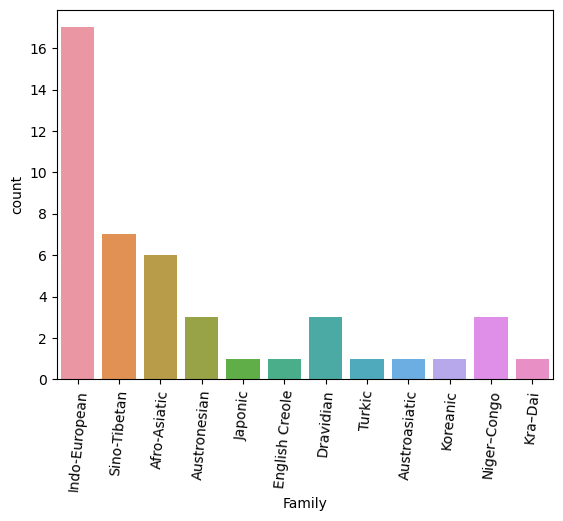

In [8]:
# draw plot 
sns.countplot(data=data, x='Family')
plt.xticks(rotation=85)
plt.show()

So we have total 12 Families of the Languages and Indo-European family have more number of Languages

In [9]:
# check data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Language                      45 non-null     object
 1   Family                        45 non-null     object
 2   Branch                        45 non-null     object
 3   First-language(L1) speakers   45 non-null     object
 4   Second-language(L2) speakers  45 non-null     object
 5   Total speakers(L1+L2)         45 non-null     object
dtypes: object(6)
memory usage: 2.2+ KB


## **What are Top 20 Language Spoken by Both as First and Second Langiage as well**

In [10]:
# get the data 
top_speakers = data[['Language', 'Total speakers(L1+L2)']].copy()
# we need to convert billion and million to numerical values
top_speakers["Total speakers(L1+L2)"] = top_speakers["Total speakers(L1+L2)"].replace({"billion":"*1e9", "million":"*1e6"}, regex=True).map(pd.eval).astype(int)
top_speakers = top_speakers.head(20)
top_speakers.head()

,Language,Total speakers(L1+L2)
0,English(excl. creole languages),1452000000
1,"Mandarin Chinese(incl. Standard Chinese, but e...",1118000000
2,Hindi(excl. Urdu),602200000
3,Spanish,548300000
4,French,274100000


In [11]:
# bar chart for top speakers
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=top_speakers['Language'], y=top_speakers['Total speakers(L1+L2)'], text=top_speakers['Total speakers(L1+L2)'], textposition='outside')])
fig.update_layout(title='Top 20 Languages Speakers both First and Second Speakers', xaxis_title="Languages", yaxis_title="Number of Speakers")
fig.show()

## **What are Top 5 Languages Spoken as a First Language in the World**

In [12]:
# get the required data
top_first = data[['Language', 'First-language(L1) speakers']].copy()
top_first.head()

,Language,First-language(L1) speakers
0,English(excl. creole languages),372.9 million
1,"Mandarin Chinese(incl. Standard Chinese, but e...",929.0 million
2,Hindi(excl. Urdu),343.9 million
3,Spanish,474.7 million
4,French,79.9 million


In [13]:
# Lets see data
top_first['First-language(L1) speakers']

0     372.9 million
1     929.0 million
2     343.9 million
3     474.7 million
4      79.9 million
5              0[a]
6     233.7 million
7     154.0 million
8     232.4 million
9      70.2 million
10     43.6 million
11     75.6 million
12    125.3 million
13      4.7 million
14     83.1 million
15     82.7 million
16     82.2 million
17     78.4 million
18     85.2 million
19     84.6 million
20     28.2 million
21     81.7 million
22                —
23     56.4 million
24     50.8 million
25                —
26     16.1 million
27                —
28     64.8 million
29                —
30     48.6 million
31     57.0 million
32     20.7 million
33     32.4 million
34     52.3 million
35     48.1 million
36     49.3 million
37                —
38     43.6 million
39     43.8 million
40     33.0 million
41     33.3 million
42     40.0 million
43     34.7 million
44     20.3 million
Name: First-language(L1) speakers, dtype: object

In [14]:
# So we have discrepencies in the dataset we will remove all that lets replace all discrepencies with 0 million
top_first['First-language(L1) speakers'] = top_first['First-language(L1) speakers'].replace(['0[a]', '—'], '0 million')

In [15]:
# lets view data again 
top_first['First-language(L1) speakers']

0     372.9 million
1     929.0 million
2     343.9 million
3     474.7 million
4      79.9 million
5         0 million
6     233.7 million
7     154.0 million
8     232.4 million
9      70.2 million
10     43.6 million
11     75.6 million
12    125.3 million
13      4.7 million
14     83.1 million
15     82.7 million
16     82.2 million
17     78.4 million
18     85.2 million
19     84.6 million
20     28.2 million
21     81.7 million
22        0 million
23     56.4 million
24     50.8 million
25        0 million
26     16.1 million
27        0 million
28     64.8 million
29        0 million
30     48.6 million
31     57.0 million
32     20.7 million
33     32.4 million
34     52.3 million
35     48.1 million
36     49.3 million
37        0 million
38     43.6 million
39     43.8 million
40     33.0 million
41     33.3 million
42     40.0 million
43     34.7 million
44     20.3 million
Name: First-language(L1) speakers, dtype: object

Now we can replace million to a numeric value

In [16]:
# replacing million with numeric value
top_first["First-language(L1) speakers"] = top_first["First-language(L1) speakers"].replace({"million":"*1e6"}, regex=True).map(pd.eval).astype(int)
top_first.head()

,Language,First-language(L1) speakers
0,English(excl. creole languages),372900000
1,"Mandarin Chinese(incl. Standard Chinese, but e...",929000000
2,Hindi(excl. Urdu),343900000
3,Spanish,474700000
4,French,79900000


In [17]:
# lets sort values in the dataframe
top_first.sort_values(by='First-language(L1) speakers', ascending=False, inplace=True)
top_first = top_first.head()
top_first.head()

,Language,First-language(L1) speakers
1,"Mandarin Chinese(incl. Standard Chinese, but e...",929000000
3,Spanish,474700000
0,English(excl. creole languages),372900000
2,Hindi(excl. Urdu),343900000
6,Bengali,233700000


In [18]:
# draw pie chart for top five language being spoken as First Language
import plotly.express as px
fig = px.pie(top_first, values='First-language(L1) speakers', names='Language', title='Top 5 Languages Spoken as First Language in the World')
fig.show()

## **What are Top 10 Languages Spoken as Second Languages in the World**

In [19]:
# lets get the data
top_second = data[['Language', 'Second-language(L2) speakers']].copy()
top_second.head()

,Language,Second-language(L2) speakers
0,English(excl. creole languages),1.080 billion[5]
1,"Mandarin Chinese(incl. Standard Chinese, but e...",198.7 million[6]
2,Hindi(excl. Urdu),258.3 million[7]
3,Spanish,73.6 million[8]
4,French,194.2 million[9]


In [20]:
# Lets view speakers columns
top_second['Second-language(L2) speakers']

0      1.080 billion[5]
1      198.7 million[6]
2      258.3 million[7]
3       73.6 million[8]
4      194.2 million[9]
5     274.0 million[11]
6      39.0 million[12]
7     104.1 million[13]
8     25.2 million [14]
9     161.0 million[15]
10    155.4 million[16]
11     59.1 million[17]
12      0.1 million[18]
13    116.0 million[19]
14     16.0 million[20]
15     13.0 million[21]
16      5.9 million[22]
17      8.0 million[23]
18      0.4 million[24]
19      0.7 million[25]
20     54.2 million[26]
21      0.1 million[27]
22                —[28]
23     21.0 million[29]
24     26.3 million[30]
25                —[31]
26     55.4 million[32]
27                —[33]
28      3.1 million[34]
29                —[35]
30     15.4 million[36]
31      5.0 million[37]
32     40.0 million[38]
33     25.1 million[39]
34      0.2 million[40]
35      3.6 million[41]
36      0.4 million[42]
37                —[43]
38      2.0 million[44]
39      0.2 million[45]
40     10.0 million[46]
41      9.0 mill

We have some discrepencies in the data we need to remove them

In [21]:
# splitting speakers columns into new dataframe
split_data = top_second['Second-language(L2) speakers'].str.split('[', expand=True)
split_data.head()

,0,1
0,1.080 billion,5]
1,198.7 million,6]
2,258.3 million,7]
3,73.6 million,8]
4,194.2 million,9]


In [22]:
# Add additional column with out [] into the origin dataframe so that we have number of speakers without []
top_second['L2 Speakers'] = split_data[0]
top_second.head()

,Language,Second-language(L2) speakers,L2 Speakers
0,English(excl. creole languages),1.080 billion[5],1.080 billion
1,"Mandarin Chinese(incl. Standard Chinese, but e...",198.7 million[6],198.7 million
2,Hindi(excl. Urdu),258.3 million[7],258.3 million
3,Spanish,73.6 million[8],73.6 million
4,French,194.2 million[9],194.2 million


In [23]:
# So we have discrepencies in the dataset we will remove all that lets replace all discrepencies with 0 million
top_second['L2 Speakers'] = top_second['L2 Speakers'].replace(['—'], '0 million')
top_second['L2 Speakers']

0     1.080 billion
1     198.7 million
2     258.3 million
3      73.6 million
4     194.2 million
5     274.0 million
6      39.0 million
7     104.1 million
8     25.2 million 
9     161.0 million
10    155.4 million
11     59.1 million
12      0.1 million
13    116.0 million
14     16.0 million
15     13.0 million
16      5.9 million
17      8.0 million
18      0.4 million
19      0.7 million
20     54.2 million
21      0.1 million
22        0 million
23     21.0 million
24     26.3 million
25        0 million
26     55.4 million
27        0 million
28      3.1 million
29        0 million
30     15.4 million
31      5.0 million
32     40.0 million
33     25.1 million
34      0.2 million
35      3.6 million
36      0.4 million
37        0 million
38      2.0 million
39      0.2 million
40     10.0 million
41      9.0 million
42      0.7 million
43      5.6 million
44     20.0 million
Name: L2 Speakers, dtype: object

In [24]:
# Now we justneed to convert billion and million to numeric values
top_second["L2 Speakers"] = top_second["L2 Speakers"].replace({"billion":"*1e9", "million":"*1e6"}, regex=True).map(pd.eval).astype(int)
top_second.head()

,Language,Second-language(L2) speakers,L2 Speakers
0,English(excl. creole languages),1.080 billion[5],1080000000
1,"Mandarin Chinese(incl. Standard Chinese, but e...",198.7 million[6],198700000
2,Hindi(excl. Urdu),258.3 million[7],258300000
3,Spanish,73.6 million[8],73600000
4,French,194.2 million[9],194200000


In [25]:
# Now we need to sort values on the basis of L2 Speakers
top_second.sort_values(by='L2 Speakers', ascending=False, inplace=True)
top_second = top_second.head(10) # As we want top 10
top_second.head()

,Language,Second-language(L2) speakers,L2 Speakers
0,English(excl. creole languages),1.080 billion[5],1080000000
5,Modern Standard Arabic(excl. dialects),274.0 million[11],274000000
2,Hindi(excl. Urdu),258.3 million[7],258300000
1,"Mandarin Chinese(incl. Standard Chinese, but e...",198.7 million[6],198700000
4,French,194.2 million[9],194200000


In [26]:
# draw bar chart to show top Ten language as Second Language
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=top_second['Language'], y=top_second['L2 Speakers'], text=top_second['L2 Speakers'], textposition='outside')])
fig.update_layout(title='Top 10 Languages being Spoken as Second Languages', xaxis_title="Languages", yaxis_title="Number of Speakers")
fig.show()